In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("train-utf8.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634112 entries, 0 to 634111
Data columns (total 49 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   POLICY_ID               634112 non-null  int64  
 1   OFFICE_ID               634112 non-null  int64  
 2   SIGORTA_TIP             634112 non-null  int64  
 3   SOZLESME_KOKENI         634112 non-null  object 
 4   SOZLESME_KOKENI_DETAY   627896 non-null  object 
 5   BASLANGIC_TARIHI        634112 non-null  object 
 6   KAPSAM_TIPI             634112 non-null  object 
 7   KAPSAM_GRUBU            634112 non-null  object 
 8   DAGITIM_KANALI          634106 non-null  object 
 9   POLICE_SEHIR            632176 non-null  object 
 10  DOGUM_TARIHI            634112 non-null  int64  
 11  CINSIYET                634112 non-null  int64  
 12  UYRUK                   634001 non-null  object 
 13  MEMLEKET                634112 non-null  int64  
 14  MESLEK              

In [4]:
df

,POLICY_ID,OFFICE_ID,SIGORTA_TIP,SOZLESME_KOKENI,SOZLESME_KOKENI_DETAY,BASLANGIC_TARIHI,KAPSAM_TIPI,KAPSAM_GRUBU,DAGITIM_KANALI,POLICE_SEHIR,...,EYLUL_VADE_TUTARI,EKIM_ODENEN_TUTAR,EKIM_VADE_TUTARI,KASIM_ODENEN_TUTAR,KASIM_VADE_TUTARI,ARALIK_ODENEN_TUTAR,ARALIK_VADE_TUTARI,SENE_BASI_HESAP_DEGERI,SENE_SONU_HESAP_DEGERI,ARTIS_DURUMU
0,7203428,10099,7,NEW,NEW,2014-04,PENSION318,STD BİREYSEL,Kanal7,ESKİŞEHİR,...,220.0,220,220.0,220,220.0,220,220.0,15248.75,25684.25,0
1,2857821,10100,7,NEW,NEW,2016-09,PENSION419,KATILIM STD BİREYSEL,Kanal4 + Kanal2,BALIKESİR,...,160.0,160,160.0,160,160.0,160,160.0,5842.71,10104.56,0
2,7833031,10042,1,NEW,NEW,2016-07,PENSION250,EV HANIMI,Kanal4 + Kanal2,BALIKESİR,...,256.0,256,256.0,256,256.0,256,256.0,3782.86,7060.94,0
3,4474944,10056,7,NEW,NEW,2014-09,PENSION434,KATILIM GRUP,Kanal4 + Kanal2,SAMSUN,...,150.0,150,150.0,150,150.0,150,150.0,6855.03,12645.25,0
4,4660085,10068,7,NEW,NEW,2008-04,PENSION100,STD GRUP,Kanal4 + Kanal2,İSTANBUL,...,100.0,100,100.0,100,100.0,100,100.0,27837.75,31613.07,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
634107,9328578,10773,1,NEW,NEW,2012-04,PENSION056,EV HANIMI,Kanal4 + Kanal2,GAZİANTEP,...,480.0,480,480.0,480,480.0,480,480.0,31436.26,39605.59,0
634108,1037693,10591,4,TRANS_TF,TRANS,2014-10,PENSION221,GRUPLANMAMIŞ,Kanal1,İSTANBUL,...,95.0,95,95.0,95,95.0,95,95.0,798503.14,1045948.58,0
634109,4285594,11422,1,NEW,NEW,2013-03,PENSION195,GRUPLANMAMIŞ,Kanal4 + Kanal2,TRABZON,...,287.0,0,287.0,0,287.0,0,287.0,20958.77,23038.39,0
634110,5443282,10348,1,NEW,NEW,2014-05,PENSION215,GRUPLANMAMIŞ,Kanal4 + Kanal2,MERSİN,...,170.0,0,170.0,0,170.0,0,170.0,122.63,133.85,0


In [5]:
df.GELIR.value_counts()

0          110175
2000        71966
3000        57058
1000        48490
5000        41195
            ...  
1657            1
3803            1
8000000         1
8509            1
2696            1
Name: GELIR, Length: 2209, dtype: int64

In [6]:
df["GELIR"]  = df["GELIR"].str.replace(",",".")

In [7]:
df["GELIR"] = df["GELIR"].astype("float")

In [8]:
df.groupby("EGITIM_DURUM").describe()["GELIR"]

,count,mean,std,min,25%,50%,75%,max
EGITIM_DURUM,,,,,,,,
(Diğer),17074.0,3.020219e+03,3.840621e+04,-3.0,1000.0,2000.0,3000.0,3.500000e+06
Doktora,2975.0,4.389629e+04,1.838424e+06,0.0,3000.0,6000.0,10000.0,1.000100e+08
Lisans,157010.0,1.273879e+09,5.047384e+11,-3.0,1200.0,3000.0,5000.0,2.000000e+14
Lise,160494.0,4.144059e+03,1.555297e+05,-3.0,1000.0,2000.0,3000.0,3.250200e+07
Yüksek Lisans,17112.0,1.829878e+05,2.293386e+07,0.0,0.0,3200.0,6000.0,3.000000e+09
Önlisans,11979.0,5.232435e+03,1.100702e+05,-1.0,1000.0,2000.0,4000.0,1.000000e+07
İlköğretim,48985.0,1.900194e+03,2.347957e+04,-2.0,0.0,1000.0,2000.0,4.200000e+06


In [9]:
new_df = df[["POLICY_ID","SIGORTA_TIP","BASLANGIC_TARIHI","POLICE_SEHIR","DOGUM_TARIHI","CINSIYET","MESLEK","EGITIM_DURUM","GELIR"]]

In [10]:
new_df

,POLICY_ID,SIGORTA_TIP,BASLANGIC_TARIHI,POLICE_SEHIR,DOGUM_TARIHI,CINSIYET,MESLEK,EGITIM_DURUM,GELIR
0,7203428,7,2014-04,ESKİŞEHİR,1964,2,SEKT032,Lisans,2500.0
1,2857821,7,2016-09,BALIKESİR,1966,1,NaN,NaN,0.0
2,7833031,1,2016-07,BALIKESİR,1956,2,NaN,NaN,0.0
3,4474944,7,2014-09,SAMSUN,1977,2,SEKT032,Lisans,2500.0
4,4660085,7,2008-04,İSTANBUL,1962,2,SEKT010,Lisans,5000.0
...,...,...,...,...,...,...,...,...,...
634107,9328578,1,2012-04,GAZİANTEP,1979,2,SEKT032,Önlisans,1000.0
634108,1037693,4,2014-10,İSTANBUL,1961,1,SEKT032,Lisans,0.0
634109,4285594,1,2013-03,TRABZON,1966,2,SEKT032,Lise,3000.0
634110,5443282,1,2014-05,MERSİN,1988,2,SEKT032,NaN,2000.0


In [12]:
new_df[(new_df["DOGUM_TARIHI"] >= 1998 ) & ((new_df["EGITIM_DURUM"].isnull()) | (new_df["EGITIM_DURUM"] == "(Diğer)")) ]["EGITIM_DURUM"]

40            NaN
719       (Diğer)
848       (Diğer)
1383      (Diğer)
1730      (Diğer)
           ...   
633270    (Diğer)
633304    (Diğer)
633497    (Diğer)
633589        NaN
633590    (Diğer)
Name: EGITIM_DURUM, Length: 3040, dtype: object

Yukarıda 98 ve daha sonra doğumluları Eğitim Durumları diğer ya da null olanları gördüm. Şimdi onları "Lise" olarak
değiştireceğim.

In [21]:
new_df.loc[(new_df["DOGUM_TARIHI"] > 1998 ) & ((new_df["EGITIM_DURUM"].isnull()) | (new_df["EGITIM_DURUM"] == "(Diğer)")) ,"EGITIM_DURUM"] = "Lise"

/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [23]:
new_df[(new_df["DOGUM_TARIHI"] < 1982 ) & (new_df["EGITIM_DURUM"] == "(Diğer)")]

,POLICY_ID,SIGORTA_TIP,BASLANGIC_TARIHI,POLICE_SEHIR,DOGUM_TARIHI,CINSIYET,MESLEK,EGITIM_DURUM,GELIR
88,4873422,7,2013-02,ANKARA,1973,2,SEKT003,(Diğer),NaN
89,3617047,7,2011-03,NEVŞEHİR,1966,2,SEKT010,(Diğer),3000.0
118,3004740,1,2017-07,BURSA,1969,2,NaN,(Diğer),NaN
169,9092571,6,2016-04,BURSA,1981,1,SEKT032,(Diğer),0.0
300,1190555,1,2017-10,İZMİR,1943,1,NaN,(Diğer),NaN
...,...,...,...,...,...,...,...,...,...
633989,9033982,1,2016-05,SAMSUN,1979,2,SEKT032,(Diğer),NaN
634019,3751517,7,2017-01,TRABZON,1968,2,SEKT032,(Diğer),2000.0
634047,2837185,1,2017-04,İSTANBUL,1981,2,NaN,(Diğer),2000.0
634062,8001325,1,2013-11,ADIYAMAN,1975,1,SEKT013,(Diğer),3500.0


In [24]:
df.GELIR.fillna(0).astype("int").sort_values(ascending=False).head(825)

585359    200000000001500
246069         9999999999
126175         3000000000
154819          500000000
614214          111111111
               ...       
435960              54000
10053               53000
454540              52000
33956               52000
254247              52000
Name: GELIR, Length: 825, dtype: int64

In [25]:
df.loc[274091]

POLICY_ID                         6721159
OFFICE_ID                           10023
SIGORTA_TIP                             6
SOZLESME_KOKENI                   TRANS_C
SOZLESME_KOKENI_DETAY               TRANS
BASLANGIC_TARIHI                  2017-07
KAPSAM_TIPI                    PENSION359
KAPSAM_GRUBU                İGES STD GRUP
DAGITIM_KANALI            Kanal3 + Kanal1
POLICE_SEHIR                     İSTANBUL
DOGUM_TARIHI                         1971
CINSIYET                                1
UYRUK                                  TR
MEMLEKET                                1
MESLEK                            SEKT009
MESLEK_KIRILIM                    OCCU013
MUSTERI_SEGMENTI                    102.0
YATIRIM_KARAKTERI                 Dengeli
MEDENI_HAL                        Married
EGITIM_DURUM                Yüksek Lisans
GELIR                             50000.0
COCUK_SAYISI                          0.0
OCAK_ODENEN_TUTAR                     917
OCAK_VADE_TUTARI                  

<AxesSubplot:>

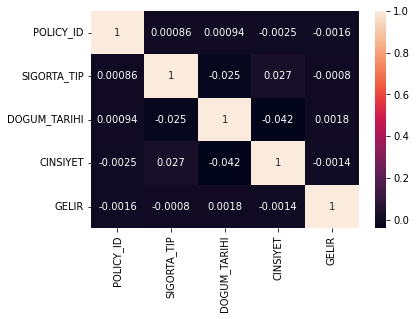

In [26]:
sns.heatmap(new_df.corr(),annot=True)

In [27]:
new_df.groupby(["EGITIM_DURUM","MESLEK"]).describe()["GELIR"].loc["Lisans"].sort_values(by="mean",ascending=False)

,count,mean,std,min,25%,50%,75%,max
MESLEK,,,,,,,,
SEKT032,49199.0,4.065335e+09,9.016788e+11,-3.0,1000.0,2000.0,3000.0,2.000000e+14
SEKT021,6280.0,8.789883e+04,6.309559e+06,0.0,3500.0,5000.0,10000.0,5.000000e+08
SEKT027,677.0,5.908200e+04,1.344972e+06,0.0,3000.0,4500.0,7500.0,3.500000e+07
SEKT003,3713.0,3.314834e+04,1.823780e+06,0.0,1111.0,2300.0,3000.0,1.111111e+08
SEKT030,26.0,2.275962e+04,2.939613e+04,1000.0,6500.0,13250.0,21500.0,1.000000e+05
SEKT028,685.0,1.508346e+04,1.367687e+05,0.0,3600.0,5000.0,10000.0,3.570000e+06
SEKT031,344.0,1.127542e+04,1.624829e+04,0.0,3000.0,7000.0,15000.0,1.500000e+05
SEKT024,550.0,1.097359e+04,8.593322e+04,0.0,3000.0,5000.0,8000.0,2.000000e+06
SEKT019,5828.0,9.639951e+03,4.195084e+05,0.0,0.0,0.0,2500.0,2.500250e+07
